In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
img_path_dark_spot = r"data\train\masks\dark_spot\0205-PHC-2mgCAE0min.jpg_2_dark_spot.png"
img_path_particle = r"data\train\masks\particle\0205-PHC-2mgCAE0min.jpg_2_particle.png"

img_dark = Image.open(img_path_dark_spot)
arr_dark = np.array(img_dark)

img_part = Image.open(img_path_particle)
arr_part = Image.open(img_path_particle)

plt.subplot(1,2,1)
plt.imshow(arr_dark)
plt.subplot(1,2,2)
plt.imshow(arr_part)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data\\train\\masks\\dark_spot\\0205-PHC-2mgCAE0min.jpg_2_dark_spot.png'

In [ ]:
print(f"The max value in the dark spot mask is: {np.max(arr_dark)}\n")
print(f"The max value in the particle mask is: {np.max(arr_part)}\n")

max_val = np.max(arr_dark)
print(f"The data type is {max_val.astype}")
print(f"Is 255 = 255.0? {255.0==max_val}")

The max value in the dark spot mask is: 255

The max value in the particle mask is: 255

The data type is <built-in method astype of numpy.uint8 object at 0x000002681C012F70>
Is 255 = 255.0? True


## Conclusions from this
This shows that the the png mask, when loaded, are in the uint8 data type with the value being either 0 or 255; they are not yet binary. This means that the line in the dataset class that makes it binary is needed, additionally, the 255 and 255.0 are equivalent so that should not be causing issues (worth throwing a sanity check in place then commenting out later)

['0205-PHC-2mgCAE0min.jpg_2.png', '0205-PHC-2mgCAE0min.jpg_5.png', '0205-PHC-2mgCAE0min.jpg_6.png']
['dark_spot', 'particle']
Len: 276
Len: 276
Image: <class 'numpy.ndarray'> (512, 512, 3) uint8
Masks: <class 'numpy.ndarray'> (512, 512, 2) float32


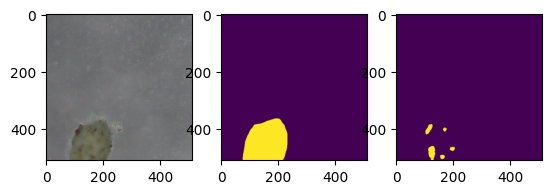

In [6]:
import os
from src.dataset import fillerDataset

image_dir = r"data\train\imgs"
images = os.listdir(image_dir)

mask_dir = r"data\train\masks"
masks = os.listdir(mask_dir)

print(images[:3])
print(masks)

ds = fillerDataset(image_dir=Path(image_dir),
                   mask_dir=Path(mask_dir),
                   classes=["particle", "dark_spot"],
                   transform=None)

print("Len:", len(ds))
img, m = ds[0]

plt.subplot(1,3,1)
plt.imshow(img)
print("Len:", len(ds))
img, m = ds[0]
print("Image:", type(img), img.shape, img.dtype)
print("Masks:", type(m), m.shape, m.dtype)  # expect (H, W, C) with C=2

plt.subplot(1,3,2)
plt.imshow(m[:,:,0])

plt.subplot(1,3,3)
plt.imshow(m[:,:,1])

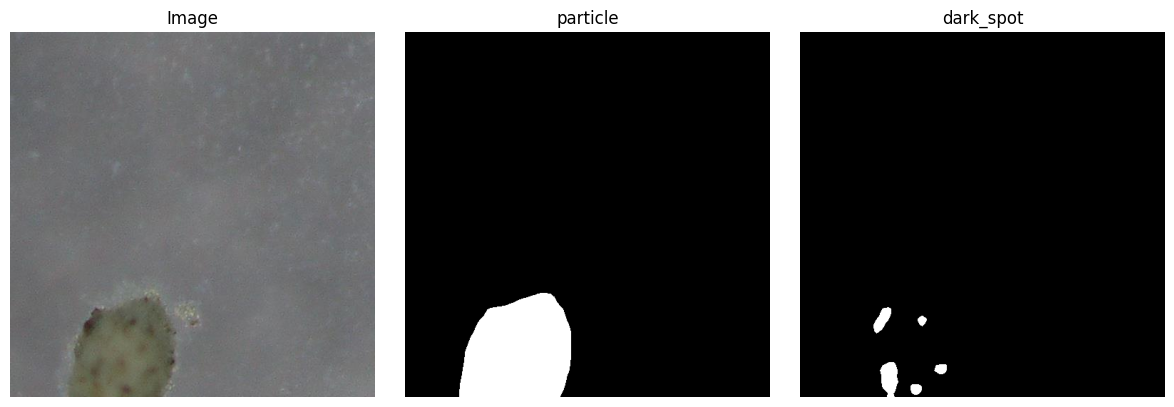

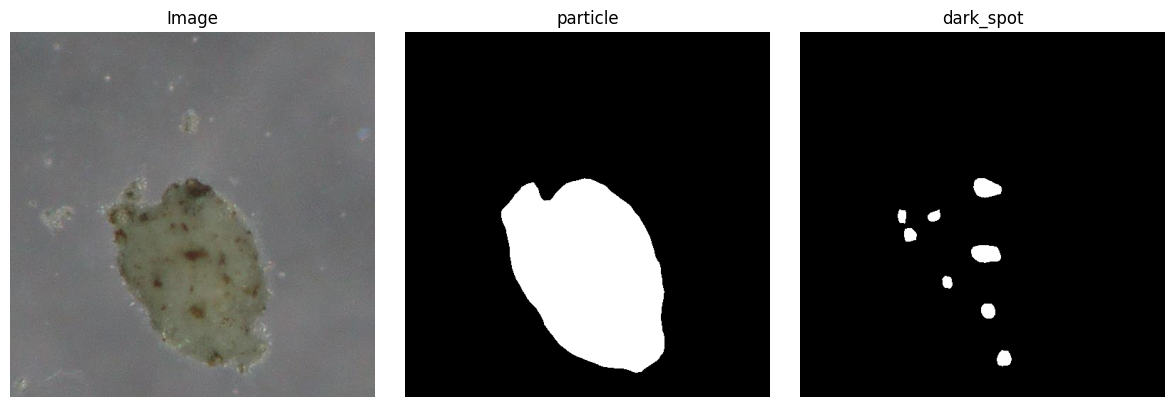

In [5]:
import matplotlib.pyplot as plt

def show_sample(ds, idx=0):
    img, m = ds[idx]
    fig, axs = plt.subplots(1, 3, figsize=(12,4))
    axs[0].imshow(img); axs[0].set_title("Image"); axs[0].axis("off")
    axs[1].imshow(m[..., 0], cmap="gray"); axs[1].set_title("particle"); axs[1].axis("off")
    axs[2].imshow(m[..., 1], cmap="gray"); axs[2].set_title("dark_spot"); axs[2].axis("off")
    plt.tight_layout(); plt.show()

show_sample(ds, 0)
show_sample(ds, 1)
